<a href="https://colab.research.google.com/github/mhabib80/Sample-Projects/blob/master/LinearRegression_honeyproduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

#Linear Regression Algorithm

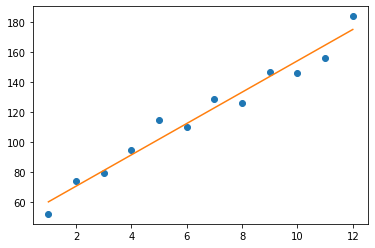

In [ ]:
import matplotlib.pyplot as plt

def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff  
  return m_gradient

#Your step_gradient function here: when the b_gradient and m_gradient are 0, b will = b_current. this will be the 'perfect' b, which when entered into the ste_gradient function in the next iteration under gradient_descent
#functio below, will again result in a b-gradient / m_gradient that are 0 and so values of b and m will remain constant throughout the iterations

def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]
  
#Your gradient_descent function here:  
def gradient_descent(x, y, learning_rate, num_iterations):
  b = 0
  m = 0
  for i in range(num_iterations):
    b, m = step_gradient(b,m,x,y, learning_rate)
  return b, m
  




months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#Uncomment the line below to run your gradient_descent function
b, m = gradient_descent(months, revenue, 0.01, 1000)

# Uncomment the lines below to see the line you've settled upon!
y = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()

# Honey Production Dataset

In [8]:
df = pd.read_csv("https://s3.amazonaws.com/codecademy-content/programs/data-science-path/linear_regression/honeyproduction.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [9]:
prod_per_year = df.groupby('year').totalprod.mean()
x = np.array(prod_per_year.index)
x = x.reshape(-1,1)
y = prod_per_year.values

In [10]:
from sklearn.linear_model import LinearRegression
honey = LinearRegression()
honey.fit(x,y)
y_hat = honey.predict(x)

In [11]:
honey.score(x, y), honey.coef_, honey.intercept_

(0.5845502894391804, array([-88303.18915238]), 181208083.10732976)

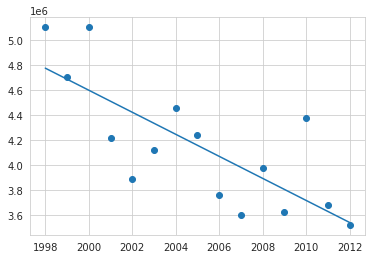

In [12]:
plt.scatter(x,y)
plt.plot(x, y_hat);

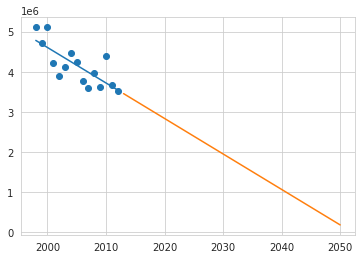

In [13]:
X_future = np.arange(2013, 2051).reshape(-1,1)
y_hat_future = honey.predict(X_future)
plt.scatter(x,y)
plt.plot(x, y_hat)
plt.plot(X_future, y_hat_future);

In [18]:
df_y = df.iloc[:,1:].groupby('year').agg({'numcol': 'sum', 'totalprod': 'sum', 'stocks':'sum', 'prodvalue':'sum', 'priceperlb':'mean','yieldpercol':'mean'})
df_y

,numcol,totalprod,stocks,prodvalue,priceperlb,yieldpercol
year,,,,,,
1998,2621000.0,219519000.0,80565000.0,146091000.0,0.832558,69.953488
1999,2637000.0,202387000.0,78390000.0,123657000.0,0.804186,65.465116
2000,2604000.0,219558000.0,84956000.0,131568000.0,0.791395,67.581395
2001,2542000.0,185748000.0,64764000.0,132282000.0,0.911818,64.545455
2002,2565000.0,171265000.0,39177000.0,227302000.0,1.371364,66.795455
2003,2591000.0,181372000.0,40619000.0,252079000.0,1.494773,62.545455
2004,2539000.0,182729000.0,60981000.0,197307000.0,1.284634,64.804878
2005,2394000.0,173969000.0,62187000.0,160793000.0,1.195122,64.268293
2006,2378000.0,154238000.0,60235000.0,157924000.0,1.303659,61.853659


<Figure size 1440x360 with 0 Axes>

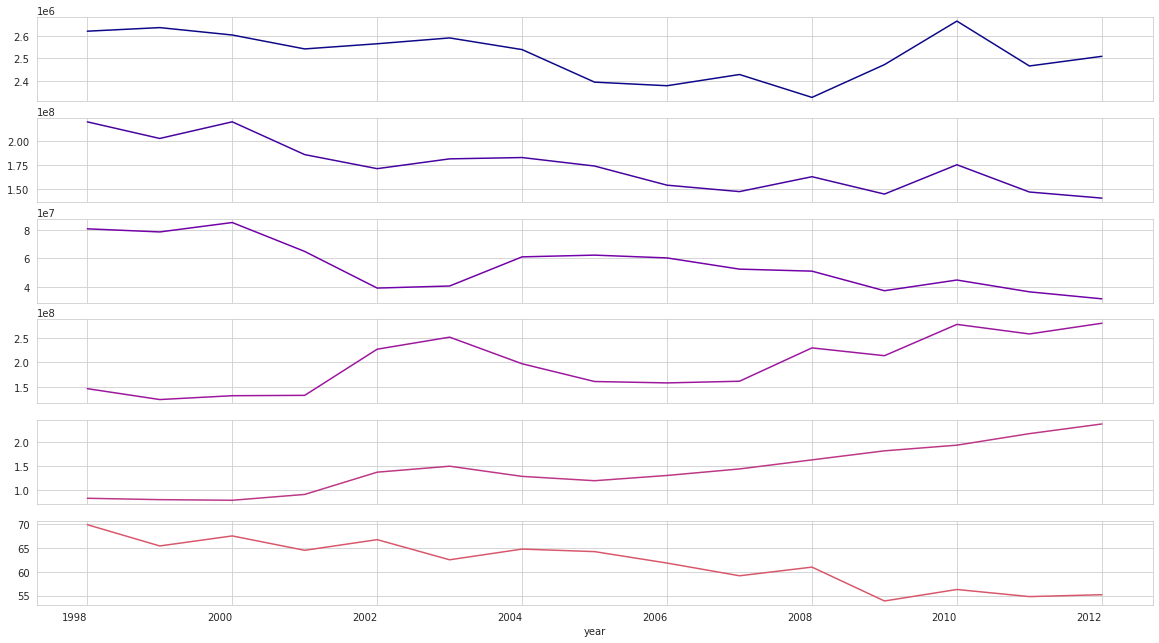

In [17]:
fig = plt.figure(figsize=(20,5))
ax = df_y.plot(subplots = True, figsize = (20, 12), title='', color = plt.cm.plasma(np.linspace(0,1,10)), rot=0, legend=False)
fig.tight_layout();

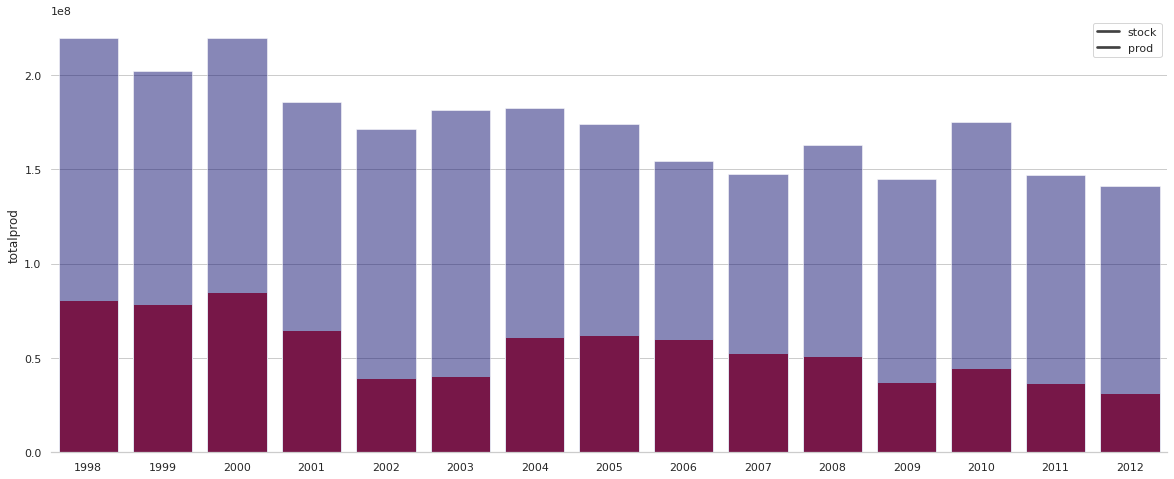

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))

ax = sns.barplot(data=df_y, x = df_y.index.values, y='stocks', color='red')
sns.barplot(data=df_y, x = df_y.index.values, y='totalprod', ax=ax, alpha=0.5, color='navy')
sns.despine(left = True)
plt.legend(['stock', 'prod']);

In [ ]:
state_year_prod = df.groupby(['state', 'year']).totalprod.mean().unstack()
state_year_prod = state_year_prod / 100000
state_year_prod

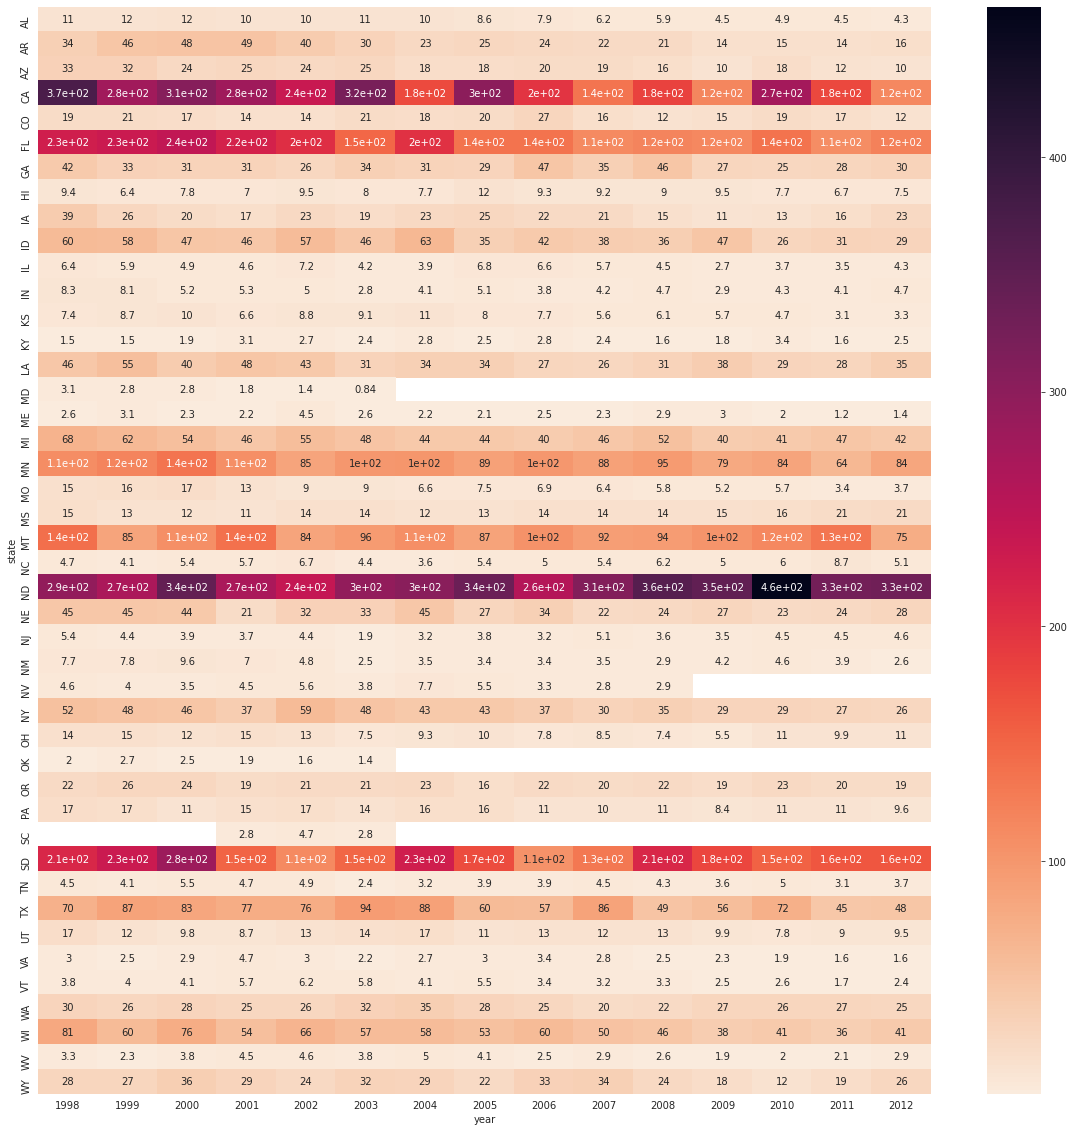

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(state_year_prod, annot=True, cmap = 'rocket_r');

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap='Blues');

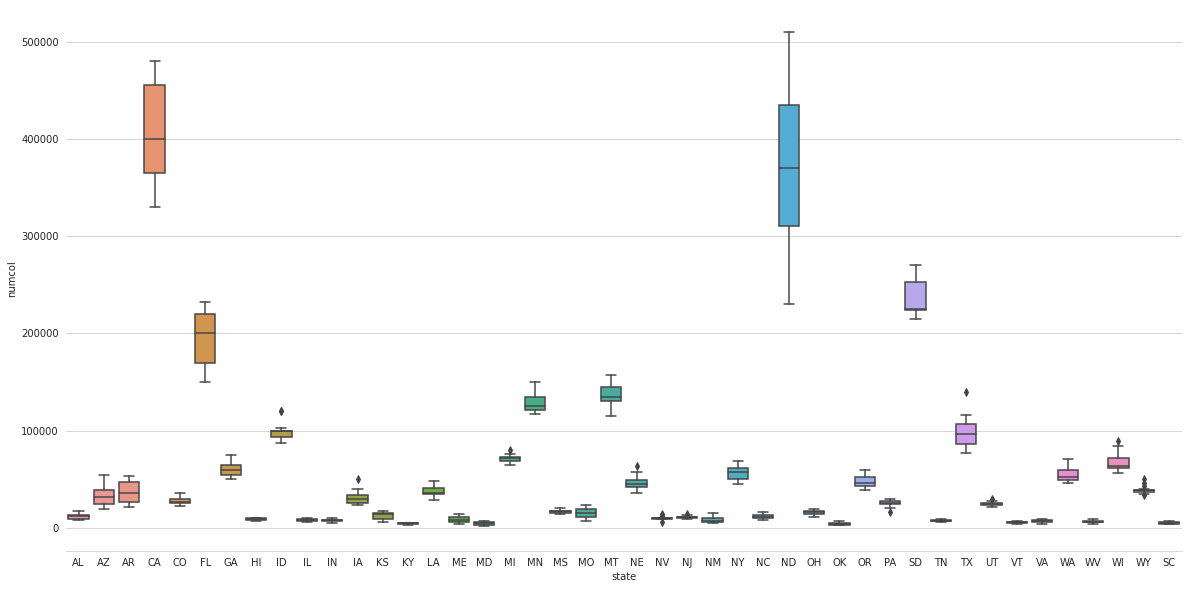

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df, x = 'state', y = 'numcol')
sns.despine(left = True);

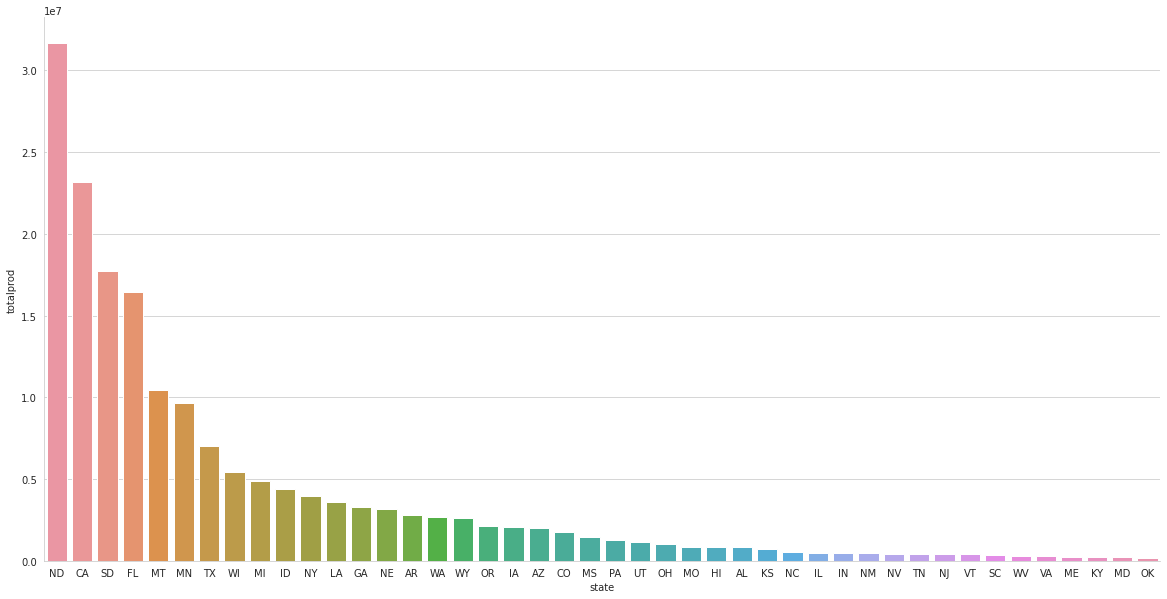

In [ ]:
order = df.groupby('state').totalprod.mean().sort_values(ascending = False).index
plt.figure(figsize = (20,10))
sns.barplot(data = df, x = 'state', y = 'totalprod', order = order, ci=None)
sns.despine();

In [ ]:
order[:8]

Index(['ND', 'CA', 'SD', 'FL', 'MT', 'MN', 'TX', 'WI'], dtype='object', name='state')

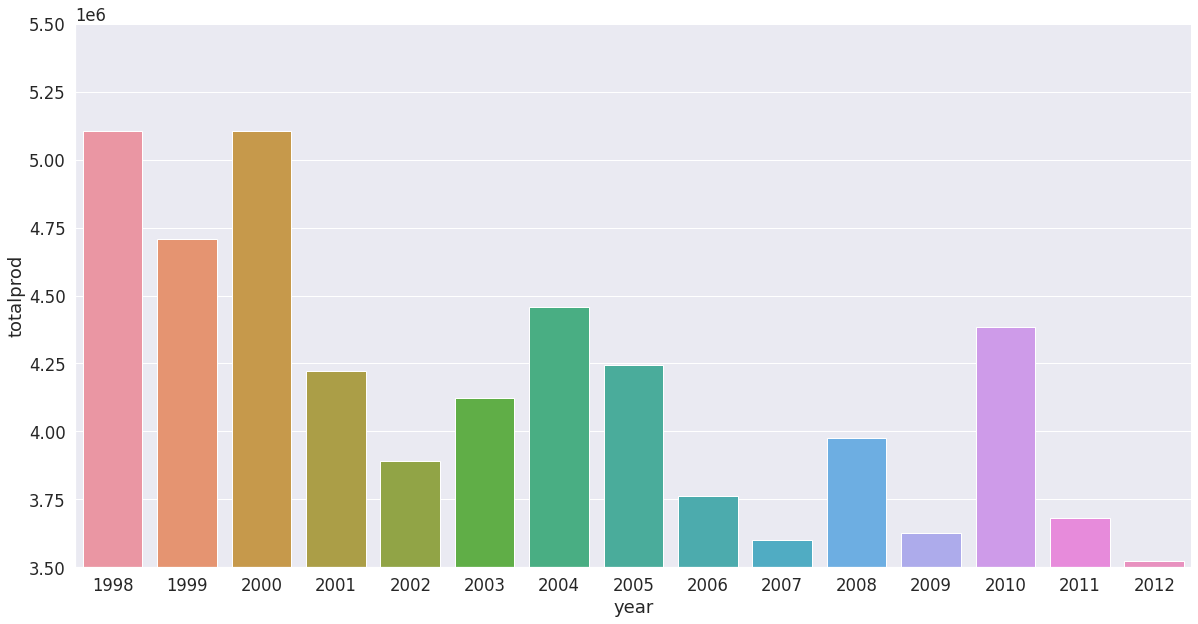

In [ ]:
order = df.groupby('state').totalprod.mean().sort_values(ascending = False).index
plt.figure(figsize = (20,10))
ax = sns.barplot(data = df, x = 'year', y = 'totalprod', ci=None)
ax.set_ylim([3500000, 5500000])
sns.despine();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2880x1440 with 0 Axes>

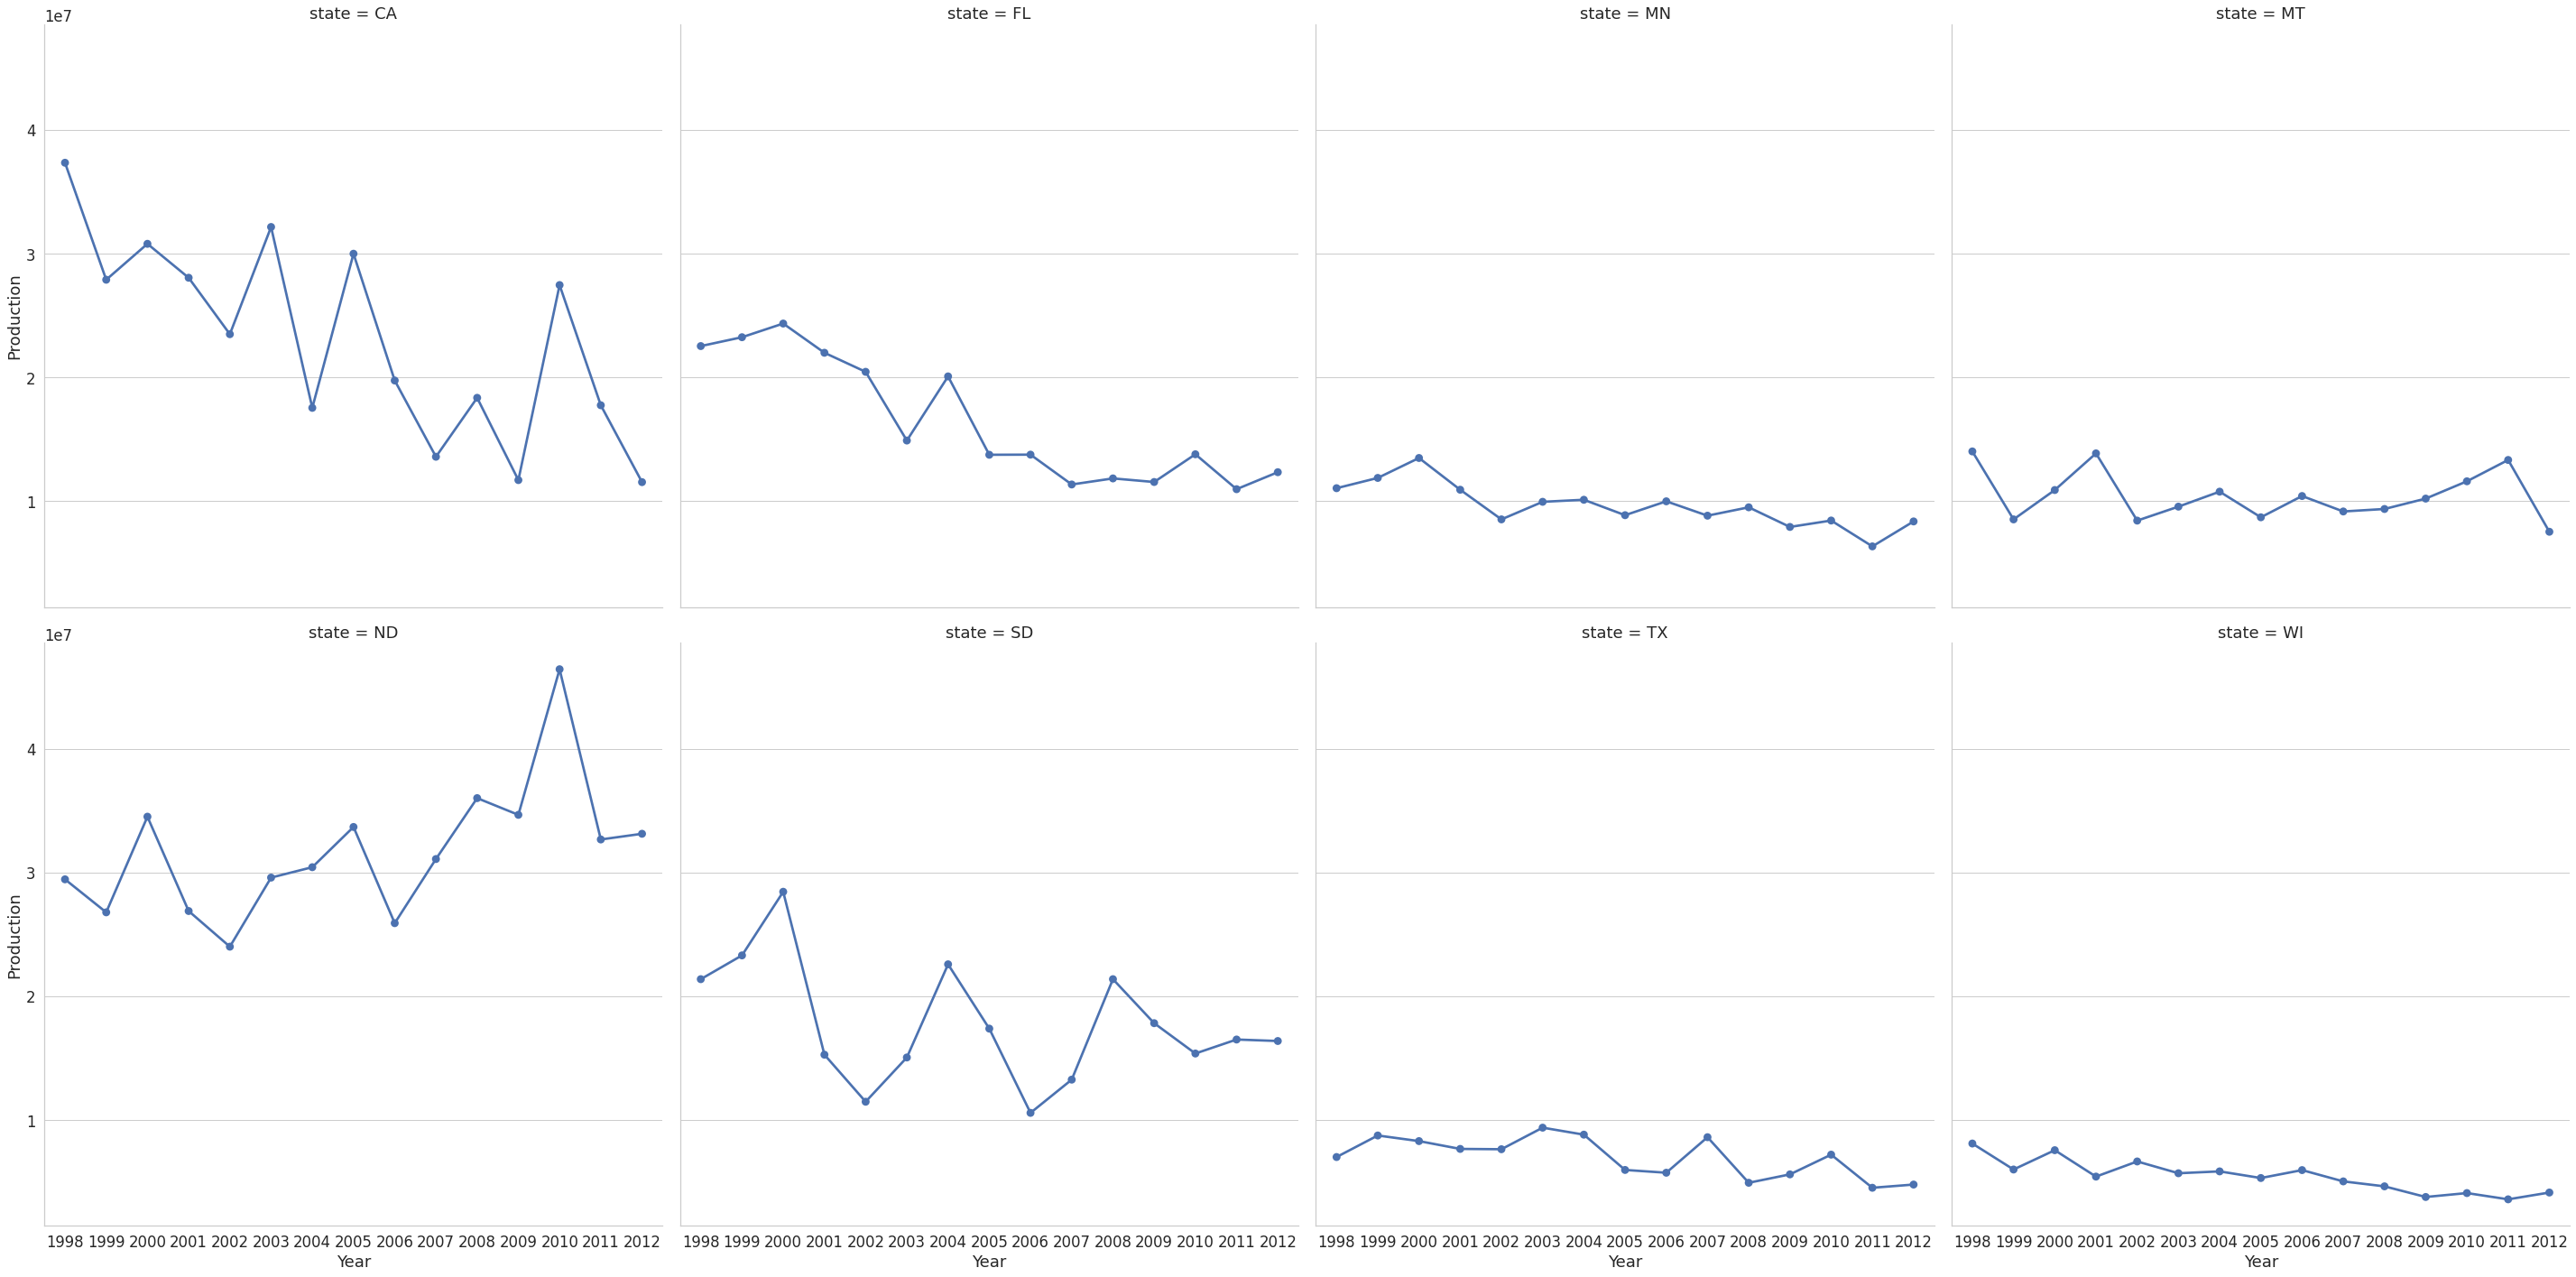

In [ ]:
sns.set_style('whitegrid')
df_8 = df[df['state'].isin(order[:8])]
plt.figure(figsize=(40,20))
g = sns.FacetGrid(df_8, col='state', col_wrap = 4, height = 10)
g.map(sns.pointplot, 'year', 'totalprod')
g.set_axis_labels(x_var='Year', y_var = 'Production', );


<Figure size 2880x1440 with 0 Axes>

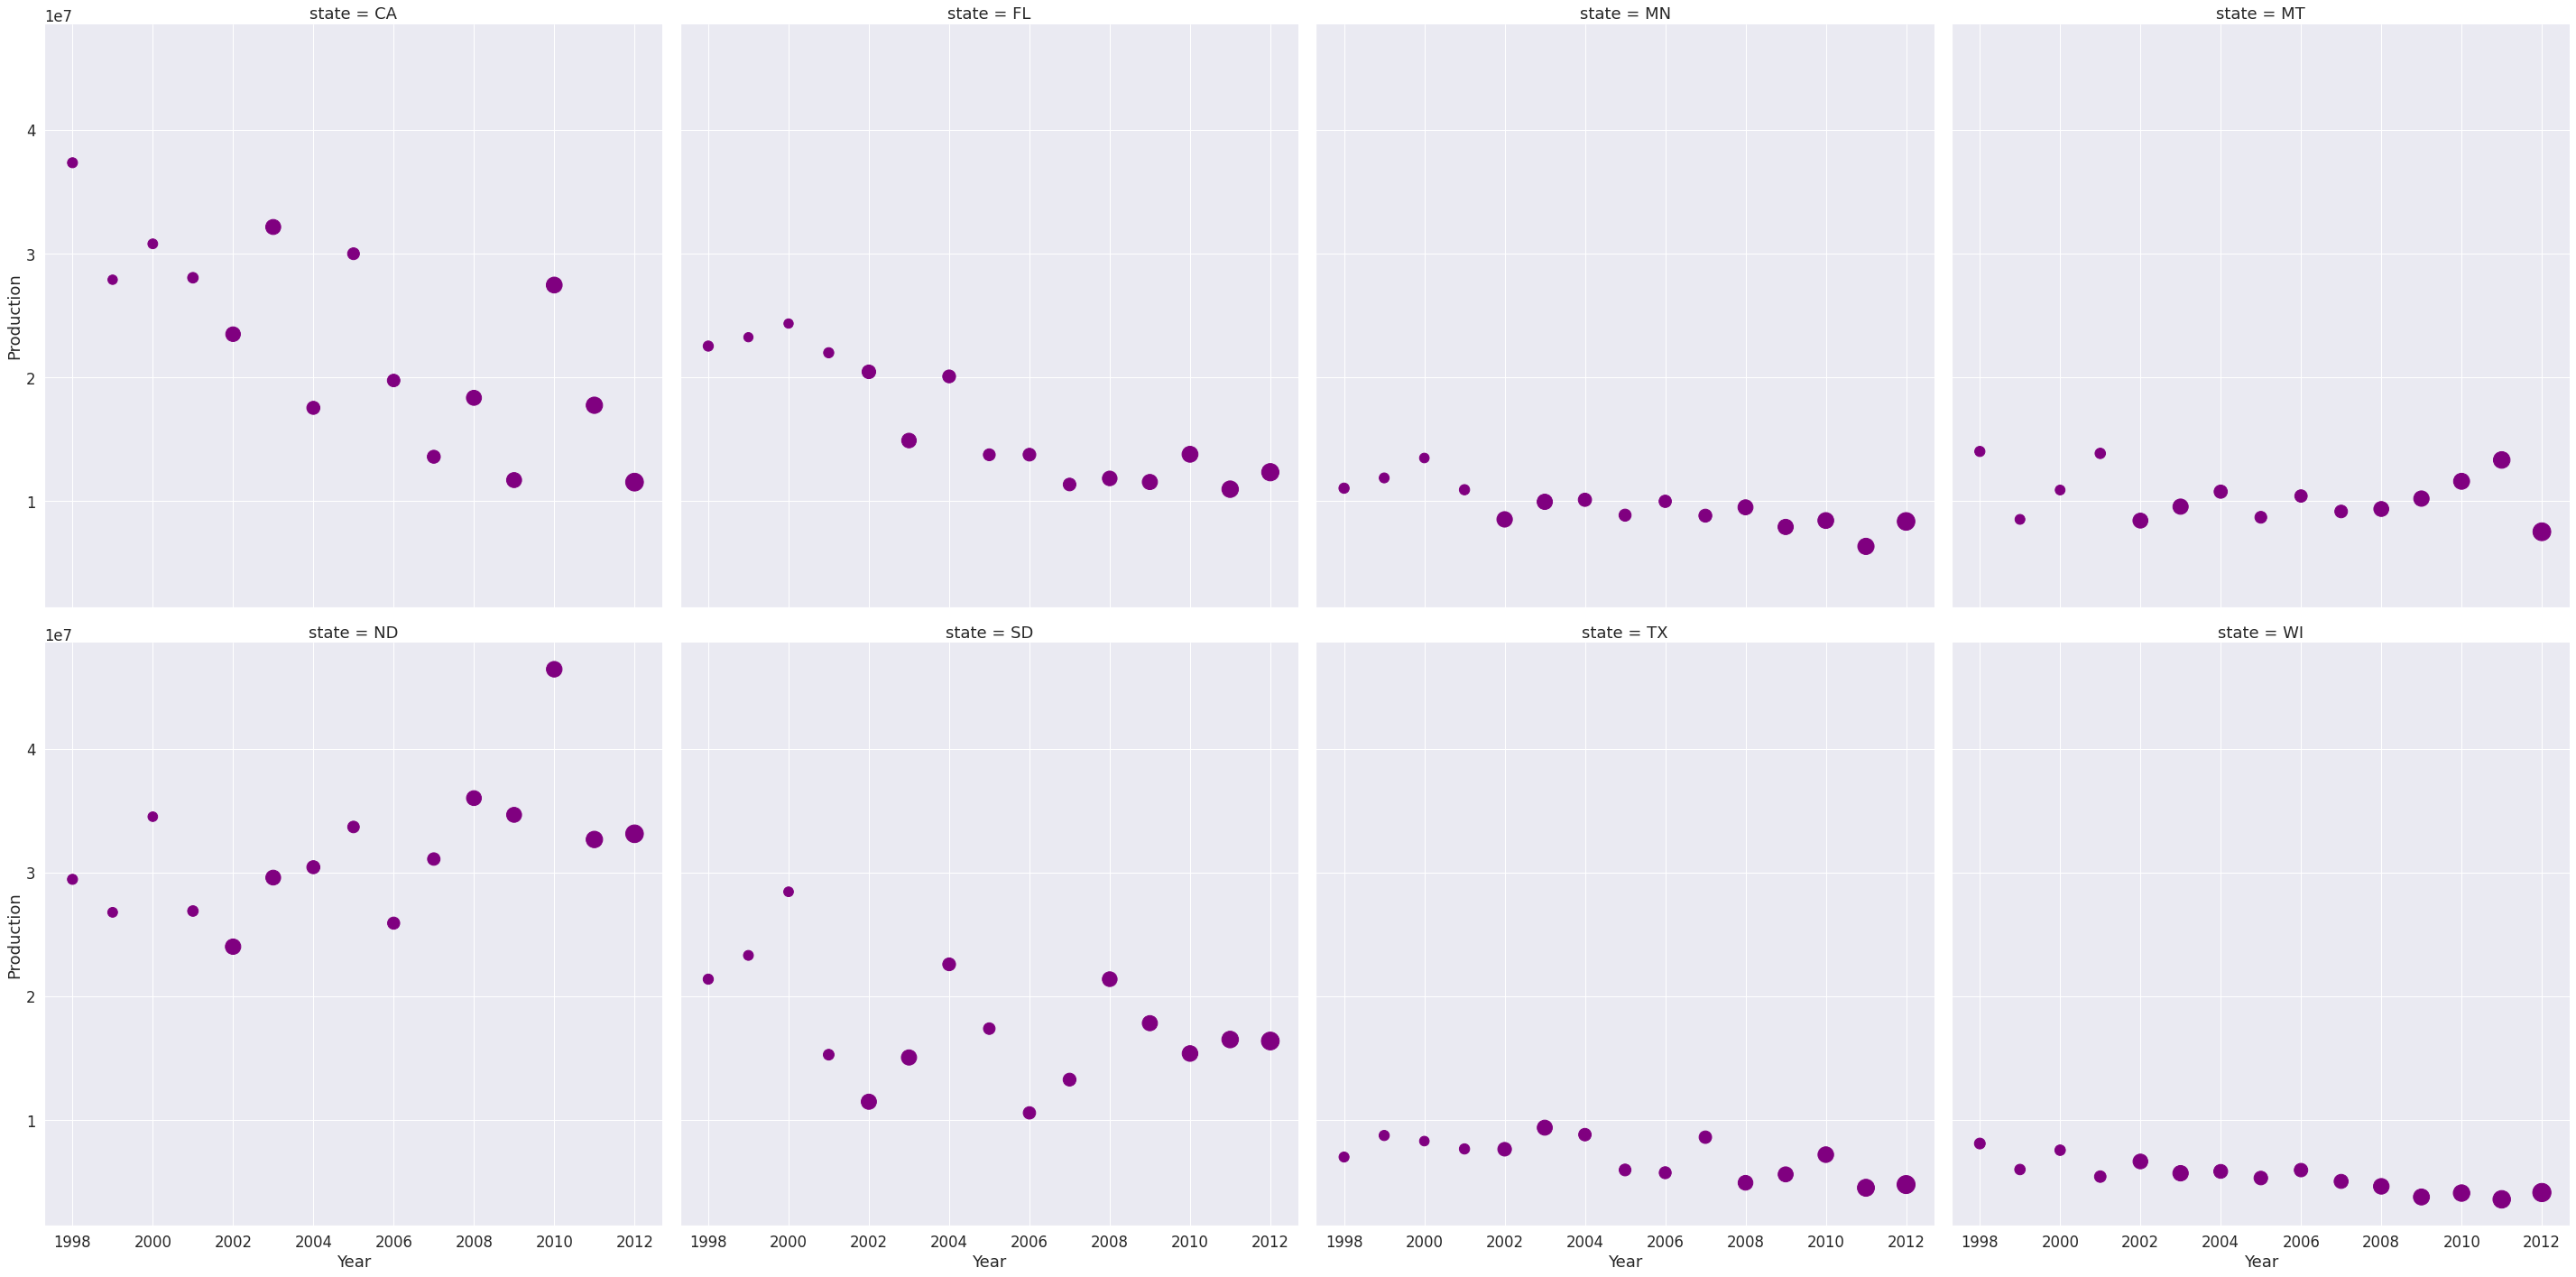

In [ ]:
df_8['size_z'] = df.priceperlb*200
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
plt.figure(figsize=(40,20))
g = sns.FacetGrid(df_8, col='state', col_wrap = 4, height = 10)
g.map(plt.scatter, 'year', 'totalprod', 'size_z', color='purple')
g.set_axis_labels(x_var='Year', y_var = 'Production' );

In [ ]:
import plotly.express as px
df_2012 = df[df.year == 2012]
plt.figure(figsize=(30,20))
fig = px.choropleth(df_2012, locations='state', color='totalprod', hover_name='state', locationmode="USA-states", scope = 'usa', color_continuous_scale=px.colors.sequential.Plasma_r,  width=1800, height=800)
fig.update_layout(title = {'text':'Honey Production by State', 'xanchor':'center', 'x':0.4}, font=dict(size=18))
fig.show()

<Figure size 2160x1440 with 0 Axes>